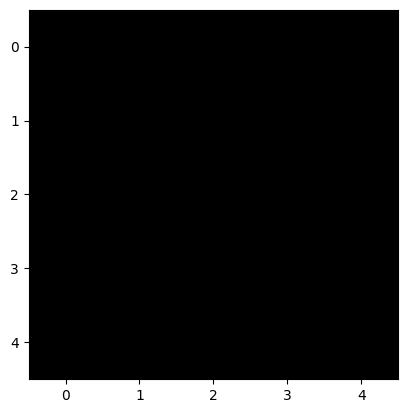

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Create a 5x5 grid
grid = [[0 for _ in range(5)] for _ in range(5)]

# Display the grid using Matplotlib
fig, ax = plt.subplots()
ax.imshow(grid, cmap='gray', interpolation='nearest')
plt.show()


# Define the start and end points
start = (0, 0)
end = (5, 5)



In [ ]:
# Define the dimensions of the grid
GRID_WIDTH = 10
GRID_HEIGHT = 10

# Define the start and end positions
START_POS = (0, 0)
END_POS = (9, 9)

# Define the obstacles
OBSTACLES = [(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2),
             (7, 3), (7, 4), (7, 5), (6, 5), (5, 5), (4, 5),
             (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7)]

# Define the cost of moving in different directions
MOVE_COST = {
    "N": 1,
    "S": 1,
    "E": 1,
    "W": 1,
    "NE": 1.5,
    "NW": 1.5,
    "SE": 1.5,
    "SW": 1.5
}

In [ ]:
# Define the heuristic function
def euclidean_distance(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)



In [ ]:
def get_neighbors(current, grid):
    neighbors = []
    row, col = current
    if row > 0 and not grid[row-1][col]:
        neighbors.append((row-1, col))
    if row < len(grid)-1 and not grid[row+1][col]:
        neighbors.append((row+1, col))
    if col > 0 and not grid[row][col-1]:
        neighbors.append((row, col-1))
    if col < len(grid[0])-1 and not grid[row][col+1]:
        neighbors.append((row, col+1))
    return neighbors

In [ ]:
def get_cost(current, next_pos):
    return 1

In [ ]:
# Define the search algorithm
def a_star_search(start, goal, grid):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while frontier:
        current = heapq.heappop(frontier)[1]

        if current == goal:
            break

        for next_pos in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + get_cost(current, next_pos)
            if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                cost_so_far[next_pos] = new_cost
                priority = new_cost + euclidean_distance(goal, next_pos)
                heapq.heappush(frontier, (priority, next_pos))
                came_from[next_pos] = current

    return came_from, cost_so_far

In [ ]:
def dijkstra_search(start, goal, grid):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while frontier:
        current = heapq.heappop(frontier)[1]

        if current == goal:
            break

        for next_pos in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + get_cost(current, next_pos)
            if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                cost_so_far[next_pos] = new_cost
                priority = new_cost
                heapq.heappush(frontier, (priority, next_pos))
                came_from[next_pos] = current

    return came_from, cost_so_far

In [ ]:
import random

# Define the possible cell values
FREE_CELL = 0
OBSTACLE_CELL = 1
START_CELL = 2
GOAL_CELL = 3
CURRENT_CELL = 4
CHECKED_CELL = 5

# Define the colors for each cell value
COLORS = {
    FREE_CELL: 'white',
    OBSTACLE_CELL: 'black',
    START_CELL: 'blue',
    GOAL_CELL: 'green',
    CURRENT_CELL: 'red',
    CHECKED_CELL: 'yellow'
}

def generate_map(width, height, obstacle_density):
    """
    Generates a random map with given dimensions and obstacle density.

    Args:
        width (int): Width of the map.
        height (int): Height of the map.
        obstacle_density (float): A float between 0 and 1, where 0 means no obstacles and 1 means the map is fully
            covered with obstacles.

    Returns:
        A tuple containing the generated map as a 2D numpy array of integers where 0 represents a free cell and 1
        represents an obstacle, as well as the start position as a tuple (row, col).
    """
    # Initialize the map with all free cells
    map = np.zeros((height, width), dtype=np.int32)

    # Insert obstacles
    for i in range(height):
        for j in range(width):
            if random.random() < obstacle_density:
                map[i][j] = 1

    # Insert drone at a random start location
    start_row = random.randint(0, height - 1)
    start_col = random.randint(0, width - 1)
    map[start_row][start_col] = 2

    return map, (start_row, start_col)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the map dimensions and obstacle density
MAP_WIDTH = 20
MAP_HEIGHT = 20
OBSTACLE_DENSITY = 0.5

for i in range(0,100):
  # Generate the map and start position
  map, start_pos = generate_map(MAP_WIDTH, MAP_HEIGHT, OBSTACLE_DENSITY)

  # Convert the map to a NumPy array of integers
  map = np.array(map).astype(int)

  # Print the map
  print(np.array2string(map))

  # Display the map using Matplotlib
  fig, ax = plt.subplots()
  ax.imshow(map, cmap=plt.cm.binary, interpolation='nearest')

  # Add the start and end points to the plot
  ax.scatter(start_pos[1], start_pos[0], marker='D', color='blue', s=100)
  ax.scatter(MAP_WIDTH-1, MAP_HEIGHT-1, marker='X', color='red', s=100)

  # Add a legend to the plot
  ax.legend()

  # Show the plot
  #plt.show()

  # Save the figure as a JPEG file
  fig.savefig(f'map_{i}.jpg')

  # Close the figure to free up memory
  plt.close(fig)


[[1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0]
 [1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 2 0 1 0]
 [1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0]
 [0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0]
 [1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0]
 [0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0]
 [1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0]
 [0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0]
 [0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0]
 [0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0]
 [1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]
 [0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1]
 [0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1]
 [1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1]]


[[0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0]
 [0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1]
 [0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0]
 [0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0]
 [0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0]
 [0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0]
 [1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1]
 [0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1]
 [0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0]
 [1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1]
 [0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1]
 [0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0]
 [0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 2]
 [0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0]
 [1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0]
 [1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0]]


[[0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0]
 [1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0]
 [0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0]
 [0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1]
 [0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1]
 [0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0]
 [0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1]
 [0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1]
 [1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1]
 [0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1]
 [1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1]
 [1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 2 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0]
 [0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0]
 [1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0]]
[[1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1]
 [1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1]
 [0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1]
 [1 1 1 1 

[[1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1]
 [2 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0]
 [0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0]
 [0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1]
 [0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1]
 [1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1]
 [1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0]
 [1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1]
 [1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]
 [1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1]
 [1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0]]
[[0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1]
 [1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 

[[1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0]
 [1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1]
 [1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0]
 [0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1]
 [0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0]
 [0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1]
 [0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1]
 [0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1]
 [1 0 1 0 0 1 1 1 1 1 1 1 2 1 1 0 1 0 0 1]
 [1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0]
 [1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0]
 [1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0]
 [0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0]
 [1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1]
 [1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0]]


[[1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1]
 [0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1]
 [0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1]
 [0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0]
 [1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0]
 [1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1]
 [0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1]
 [1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0]
 [1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1]
 [1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1]
 [1 0 0 0 1 1 0 0 1 1 2 0 1 1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0]]


[[1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0]
 [0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0]
 [1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1]
 [0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]
 [1 0 1 1 1 1 1 1 0 0 2 1 1 1 1 0 1 0 1 0]
 [0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1]
 [1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0]
 [0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1]
 [1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1]
 [0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
 [0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0]
 [0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0]]


[[1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1]
 [1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1]
 [0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1]
 [0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1]
 [1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0]
 [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0]
 [0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1]
 [1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0]
 [1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 2 1 1 1 0]
 [0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1]
 [1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1]]


[[0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]
 [1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1]
 [1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1]
 [0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0]
 [1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1]
 [1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1]
 [0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0]
 [1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1]
 [0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1]
 [1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1]
 [0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0]
 [0 1 1 0 1 1 1 2 0 1 1 0 0 1 0 0 1 0 1 0]]


[[0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0]
 [0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1]
 [0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1]
 [0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0]
 [0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0]
 [1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1]
 [1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1]
 [1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1]
 [1 0 0 1 0 2 1 1 0 0 1 0 1 1 1 0 1 1 1 0]
 [0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1]
 [0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1]
 [1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0]]


[[1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0]
 [0 0 2 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0]
 [1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1]
 [0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1]
 [0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0]
 [1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1]
 [0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1]
 [1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
 [1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1]
 [1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0]
 [1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0]]
[[1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1]
 [0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0]
 [1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0]
 [0 1 0 1 

[[1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0]
 [1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1]
 [1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0]
 [0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1]
 [1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 2 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0]
 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1]
 [1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1]
 [0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0]]
[[1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1]
 [1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0]
 [1 1 0 1 

[[1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1]
 [0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1]
 [1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0]
 [0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1]
 [1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1]
 [1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1]
 [1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1]
 [0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0]
 [0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0]
 [1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1]
 [0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 2 0 1 0 1]
 [1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0]]


[[0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0]
 [0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1]
 [0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0]
 [2 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0]
 [1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1]
 [0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1]
 [1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
 [0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1]
 [1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0]
 [0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0]
 [1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1]
 [1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1]]


[[1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1]
 [0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1]
 [1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0]
 [1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0]
 [0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0]
 [0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0]
 [1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0]
 [1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1]
 [0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1]
 [1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1]
 [0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 2 0 0 0]
 [0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1]
 [0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1]]


[[1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1]
 [0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1]
 [0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1]
 [0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0]
 [0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1]
 [1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
 [0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0]
 [1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0]
 [1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]
 [1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1]
 [1 1 1 0 2 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0]]


[[1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0]
 [0 0 1 1 0 0 2 1 0 1 0 1 1 0 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0]
 [0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1]
 [1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1]
 [1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0]
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0]
 [1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0]
 [0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0]
 [1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0]
 [1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1]
 [1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1]
 [1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1]]


[[1 0 2 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0]
 [1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0]
 [0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1]
 [1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1]
 [0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1]
 [1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1]
 [1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0]
 [0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0]
 [1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0]
 [0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0]
 [1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]
 [0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1]]


[[1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1]
 [1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0]
 [0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1]
 [0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
 [1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1]
 [0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1]
 [1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1]
 [0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0]
 [0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1]
 [1 1 1 2 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0]]


[[1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0]
 [1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1]
 [0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 2 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0]
 [0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
 [0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0]
 [0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1]
 [1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1]
 [1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1]
 [0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0]
 [1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1]
 [0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0]]


[[1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1]
 [0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0]
 [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 1 2 0 1 1 1 1 0 1 0 0 1 1 1]
 [0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1]
 [1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1]
 [1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0]
 [0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1]
 [0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1]
 [1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1]]


[[0 1 0 1 0 0 1 0 1 0 0 2 0 1 0 1 1 0 1 1]
 [1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]
 [0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0]
 [0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0]
 [0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1]
 [1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1]
 [0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1]
 [0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1]
 [0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0]
 [0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1]
 [0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0]]


[[1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1]
 [1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1]
 [1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]
 [1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0]
 [0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0]
 [1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1]
 [1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0]
 [1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0]
 [0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1]
 [1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 2 1 0 1 0]
 [0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0]]


[[0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0]
 [1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1]
 [0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1]
 [0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0]
 [0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0]
 [1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1]
 [1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 2 0]
 [0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0]
 [0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0]
 [1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1]
 [1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1]
 [0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0]]
[[1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1]
 [0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1]
 [0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0]
 [1 1 0 1 

[[0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1]
 [0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0]
 [0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0]
 [1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0]
 [0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0]
 [1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1]
 [1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1]
 [1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1]
 [1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0]
 [0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1]
 [0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1]
 [0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1]
 [1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 2 0 0 0 0 1 1 0 0 0 0 1 0 1 1]]


[[1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0]
 [1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0]
 [0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0]
 [1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1]
 [0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0]
 [1 2 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0]
 [0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1]
 [0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1]
 [1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0]
 [0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0]
 [0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]
 [1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1]]


[[0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0]
 [1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1]
 [0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0]
 [1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1]
 [0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1]
 [1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0]
 [0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1]
 [0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0]
 [1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1]
 [1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1]
 [1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1]
 [1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0]
 [1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0]
 [1 1 0 1 1 1 1 1 1 0 1 0 1 1 2 0 0 0 1 1]
 [1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1]
 [1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0]]


[[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0]
 [0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1]
 [1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0]
 [1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1]
 [0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]
 [1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0]
 [1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1]
 [1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0]
 [1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0]
 [0 0 2 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0]
 [0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0]]


[[0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1]
 [1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0]
 [1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0]
 [1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0]
 [1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1]
 [1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0]
 [0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1]
 [0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0]
 [0 2 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0]
 [0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1]
 [1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0]
 [1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0]
 [1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1]
 [0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1]
 [1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0]
 [0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1]
 [0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1]]


[[0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1]
 [0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1]
 [0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0]
 [1 0 0 1 2 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1]
 [0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1]
 [0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0]
 [0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0]
 [0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1]
 [0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1]]


[[0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1]
 [0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1]
 [0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 1 0 1 1 1 0 2 1 1 0 1 0 0 1 0 1 0 0]
 [0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1]
 [0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1]
 [0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0]
 [0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0]
 [0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1]
 [1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0]
 [0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1]
 [0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
 [0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0]]


[[0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1]
 [1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1]
 [1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0]
 [0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0]
 [0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0]
 [1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
 [1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0]
 [1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0]
 [0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
 [1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 2]
 [1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0]
 [1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0]
 [0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0]
 [1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1]]


[[1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1]
 [0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1]
 [1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0]
 [1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0]
 [1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0]
 [1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0]
 [1 0 0 1 1 1 1 2 0 1 1 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1]
 [1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1]
 [0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0]
 [0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0]
 [0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0]
 [1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0]
 [1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1]]


[[0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1]
 [1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0]
 [1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1]
 [1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1]
 [1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1]
 [0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1]
 [0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0]
 [1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0]
 [0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
 [1 0 1 1 1 1 1 0 1 0 1 0 1 2 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0]
 [1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0]
 [1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1]
 [1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0]]


[[1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0]
 [0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0]
 [1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1]
 [1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1]
 [1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1]
 [0 0 0 1 0 0 1 1 0 2 0 0 1 0 1 0 0 1 0 0]
 [1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0]
 [1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1]
 [1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0]
 [1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0]
 [1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1]]


[[0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 2 1 1]
 [1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1]
 [1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1]
 [0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0]
 [1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1]
 [1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1]
 [0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1]
 [0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1]
 [1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1]
 [1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0]
 [1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0]]


[[1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1]
 [0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0]
 [0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1]
 [1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0]
 [0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1]
 [1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0]
 [0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1]
 [1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0]
 [0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1]
 [1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1]
 [1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1]
 [0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 2 0]
 [1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1]]


[[1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0]
 [1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1]
 [0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1]
 [1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1]
 [1 1 1 0 2 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0]
 [1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1]
 [0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0]
 [1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0]
 [1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1]
 [0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0]
 [0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1]]


[[0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0]
 [0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1]
 [0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1]
 [1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1]
 [0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1]
 [0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0]
 [1 1 0 2 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1]
 [1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1]
 [1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0]
 [1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1]
 [1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0]
 [0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0]
 [0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0]
 [0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0]]


[[0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0]
 [0 0 1 0 0 0 1 1 0 1 1 1 0 2 1 1 0 1 1 0]
 [1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0]
 [0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0]
 [0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0]
 [1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1]
 [0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0]
 [1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1]
 [0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0]
 [1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1]
 [0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1]
 [1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0]
 [1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1]]


[[0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1]
 [1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1]
 [1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0]
 [1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0]
 [0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0]
 [1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1]
 [0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0]
 [1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1]
 [0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1]
 [1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1]
 [1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 1 0 0 1 0]
 [1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0]
 [1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0]]


[[0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1]
 [0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1]
 [0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0]
 [0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1]
 [0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1]
 [1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1]
 [1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0]
 [2 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0]
 [1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1]
 [1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1]
 [1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1]
 [0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]]
[[0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0]
 [1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0]
 [1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1]
 [1 1 1 1 

[[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0]
 [0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0]
 [0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0]
 [0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1]
 [1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0]
 [1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1]
 [0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1]
 [0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0]
 [1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0]
 [1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0]
 [1 0 0 1 1 1 0 1 0 2 0 0 1 1 0 0 1 0 1 1]
 [0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1]
 [0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1]
 [1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1]
 [1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0]
 [0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1]
 [0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1]]
[[1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0]
 [1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 

[[0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1]
 [1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0]
 [0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0]
 [1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1]
 [1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1]
 [1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0]
 [0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0]
 [1 0 1 0 0 0 1 1 0 0 0 2 1 0 1 1 0 1 1 1]
 [1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1]
 [1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1]
 [1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1]
 [1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1]
 [0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0]
 [0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0]]
[[1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0]
 [0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1]
 [1 1 0 1 

[[1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1]
 [0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1]
 [0 0 0 2 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0]
 [1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0]
 [1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0]
 [1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1]
 [1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0]
 [0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0]
 [1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1]
 [0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0]
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1]]
[[0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0]
 [0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]
 [1 1 1 0 

[[0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0]
 [0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0]
 [1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1]
 [0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1]
 [0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0]
 [0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0]
 [0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0]
 [1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0]
 [1 0 1 0 0 0 1 1 1 2 1 1 1 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1]
 [1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1]
 [0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0]
 [0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1]
 [1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1]
 [0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1]]
[[1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0]
 [1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0]
 [0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 

[[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
 [0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0]
 [1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1]
 [0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1]
 [1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1]
 [1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1]
 [1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1]
 [0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1]
 [1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1]
 [1 1 1 1 0 1 0 0 1 0 0 2 0 1 0 0 0 0 0 1]]
[[1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1]
 [0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1]
 [1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 

[[0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1]
 [0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1]
 [0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1]
 [1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0]
 [1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 2 0 0 0 0]
 [0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0]
 [1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1]
 [1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1]
 [1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0]
 [0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1]
 [1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1]
 [1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1]
 [0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1]
 [1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1]]
[[1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0]
 [0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0]
 [1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1]
 [0 1 0 1 

[[1 1 1 1 1 1 0 1 1 2 1 1 1 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1]
 [0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1]
 [1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1]
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1]
 [0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0]
 [0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1]
 [1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1]
 [1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]
[[1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0]
 [0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]
 [1 1 1 1 

[[0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1]
 [0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0]
 [0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0]
 [0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0]
 [1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1]
 [0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1]
 [0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1]
 [2 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1]
 [0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1]
 [0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0]
 [1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0]
 [1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0]
 [0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]]
[[0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1]
 [0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0]
 [1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0]
 [1 1 0 0 

[[1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1]
 [0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1]
 [0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1]
 [0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0]
 [0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0]
 [1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1]
 [0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1]
 [0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1]
 [1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 2 0 1 0 1]
 [1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1]
 [0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1]
 [0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1]]


[[0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1]
 [1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0]
 [1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 2 0 1 0 1 0 0 1 1 1 1 0]
 [1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1]
 [1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0]]
[[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1]
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0]
 [0 1 1 1 

[[0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0]
 [1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1]
 [0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1]
 [1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1]
 [0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1]
 [0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1]
 [0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0]
 [1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0]
 [1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0]
 [1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 2]]
[[0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1]
 [0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 1 1 

[[1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1]
 [1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1]
 [1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1]
 [1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0]
 [0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1]
 [1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1]
 [1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 2 1]
 [1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0]
 [1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1]
 [0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0]
 [1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1]
 [1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0]
 [1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0]]
[[1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0]
 [1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0]
 [1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0]
 [0 0 1 1 

[[1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1]
 [1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1]
 [0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1]
 [1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1]
 [0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1]
 [0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0]
 [1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0]
 [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
 [0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1]
 [1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1]
 [0 1 1 0 0 0 1 2 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1]
 [0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0]
 [0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1]
 [0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1]]
[[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0]
 [1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0]
 [0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1]
 [0 1 0 1 

[[1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1]
 [1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1]
 [0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0]
 [1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0]
 [0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0]
 [1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0]
 [0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0]
 [0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0]
 [1 1 2 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0]
 [1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1]]
[[0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1]
 [1 1 0 0 

[[1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1]
 [0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0]
 [0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1]
 [1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1]
 [1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0]
 [1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0]
 [1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 2 0 0 1 1 1 1 0 0]
 [0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0]
 [1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0]
 [1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0]
 [1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1]
 [0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1]
 [1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1]
 [0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0]
 [0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0]]
[[0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1]
 [0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 2 1 1 1 1]
 [1 0 0 0 

[[1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0]
 [1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1]
 [1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0]
 [0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0]
 [0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1]
 [0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1]
 [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0]
 [0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 0 0 1 0 2 0 0 1 0 1 1 0 1]
 [1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1]
 [1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1]
 [1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1]]
[[1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0]
 [0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1]
 [0 1 1 0 

[[1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1]
 [1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1]
 [0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1]
 [0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1]
 [0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1]
 [0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1]
 [0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0]
 [1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 2 0 0 1 1]
 [1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0]
 [0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1]]
[[0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1]
 [1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0]
 [1 0 1 1 

[[0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0]
 [0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0]
 [0 1 1 0 1 0 2 0 0 1 0 0 1 0 1 0 1 1 1 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1]
 [1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1]
 [1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1]
 [1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0]
 [0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0]
 [0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1]
 [0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0]
 [0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1]
 [0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1]
 [1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0]
 [0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1]
 [0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1]]
[[1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1]
 [0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
 [0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 1 

[[1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0]
 [1 0 0 0 1 1 1 0 1 0 1 2 1 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1]
 [0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1]
 [1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0]
 [1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1]
 [0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1]
 [1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0]
 [1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0]
 [1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0]
 [1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1]]
[[1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0]
 [0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0]
 [0 0 0 1 

[[1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0]
 [1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0]
 [2 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1]
 [1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0]
 [1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0]
 [1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0]
 [0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1]
 [0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1]
 [0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1]
 [1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1]
 [0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1]
 [1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1]
 [1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1]]
[[0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 2]
 [1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1]
 [1 0 1 1 

[[1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]
 [0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1]
 [1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0]
 [0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0]
 [1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]
 [0 0 2 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1]
 [1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1]
 [1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0]
 [0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1]
 [1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1]
 [1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0]
 [1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0]
 [0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
 [0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]]
[[1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0]
 [1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1]
 [1 0 1 1 

[[0 1 1 0 0 0 0 0 2 0 1 1 0 1 1 1 0 1 1 1]
 [0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0]
 [0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1]
 [1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0]
 [1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1]
 [0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1]
 [1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1]
 [0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0]
 [1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1]
 [1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1]
 [0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
 [0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1]
 [1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1]]
[[1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0]
 [0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1]
 [1 1 1 0 

[[1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1]
 [1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
 [1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1]
 [0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1]
 [0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1]
 [0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0]
 [1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0]
 [0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 2 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1]
 [0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0]
 [0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0]
 [1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0]]
[[0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1]
 [1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0]
 [0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0]
 [0 0 1 0 

[[1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1]
 [1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1]
 [0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 2 1 0 0 0]
 [1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1]
 [0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1]
 [1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0]
 [1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1]
 [0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0]
 [1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0]
 [0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1]
 [1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1]
 [1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0]
 [0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0]
 [0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0]]
[[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0]
 [1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0]
 [1 1 0 1 

[[1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1]
 [1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1]
 [0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1]
 [1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0]
 [1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0]
 [0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0]
 [0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1]
 [0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1]
 [0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0]
 [1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1]
 [0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1]
 [0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 2 0 1]
 [1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1]]
[[0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1]
 [0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0]
 [1 0 0 0 

[[0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1]
 [1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1]
 [0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 2 1 0 0 1]
 [1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1]
 [0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1]
 [1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1]
 [1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1]
 [0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1]
 [1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1]]
[[0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1]
 [0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1]
 [1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0]
 [0 1 1 0 

[[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0]
 [0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1]
 [1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1]
 [0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1]
 [0 1 0 0 1 0 2 1 1 0 0 0 1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0]
 [1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1]
 [0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0]
 [0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1]
 [0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1]
 [0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0]
 [0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1]
 [0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0]
 [0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1]
 [1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1]]


KeyError: ignored

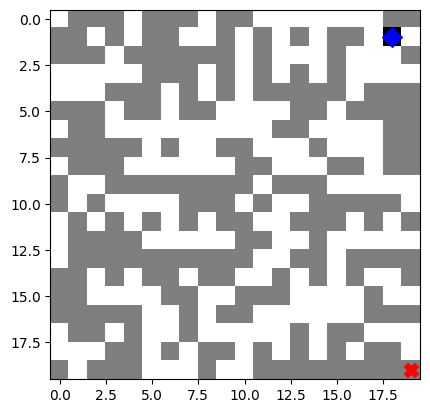

In [ ]:
# Run the search algorithms
path_dijkstra = dijkstra_search(start_pos, (MAP_HEIGHT-1, MAP_WIDTH-1), map)
path_a_star = a_star_search(start_pos, (MAP_HEIGHT-1, MAP_WIDTH-1), map)
#path_bfs = breadth_first_search(start_pos, (MAP_HEIGHT-1, MAP_WIDTH-1), map)

# Display the map using Matplotlib
fig, ax = plt.subplots()
ax.imshow(map, cmap=plt.cm.binary, interpolation='nearest')

# Add the start and end points to the plot
ax.scatter(start_pos[1], start_pos[0], marker='D', color='blue', s=100)
ax.scatter(MAP_WIDTH-1, MAP_HEIGHT-1, marker='X', color='red', s=100)

# Plot the paths found by the search algorithms
ax.plot([pos[1] for pos in path_dijkstra], [pos[0] for pos in path_dijkstra], color='orange', label='Dijkstra')
ax.plot([pos[1] for pos in path_a_star], [pos[0] for pos in path_a_star], color='green', label='A*')
#ax.plot([pos[1] for pos in path_bfs], [pos[0] for pos in path_bfs], color='purple', label='BFS')

# Add a legend to the plot
ax.legend()


# Show the plot
plt.show()

In [ ]:
# Define a function to display the map with the path
def display_map_with_path(path):
    path_array = np.array(map_array, dtype='<U2')
    for pos in path:
        path_array[pos] = '*'
    print(path_array)

In [ ]:
def reconstruct_path(came_from, start, end):
    current = end
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


In [ ]:
# Run the search algorithms and display the results
print('A* search:')
came_from, cost_so_far = a_star_search(start, end, map)
path = reconstruct_path(came_from, start, end)
print('Path:', path)
display_map_with_path(path)

print('Dijkstra search:')
came_from, cost_so_far = dijkstra_search(start, end, map)
path = reconstruct_path(came_from, start, end)
print('Path:', path)
display_map_with_path(path)

print('Breadth-first search:')
came_from, cost_so_far = bfs_search(start, end, map)
path = reconstruct_path(came_from, start, end)
print('Path:', path)
display_map_with_path(path)


A* search:


KeyError: ignored